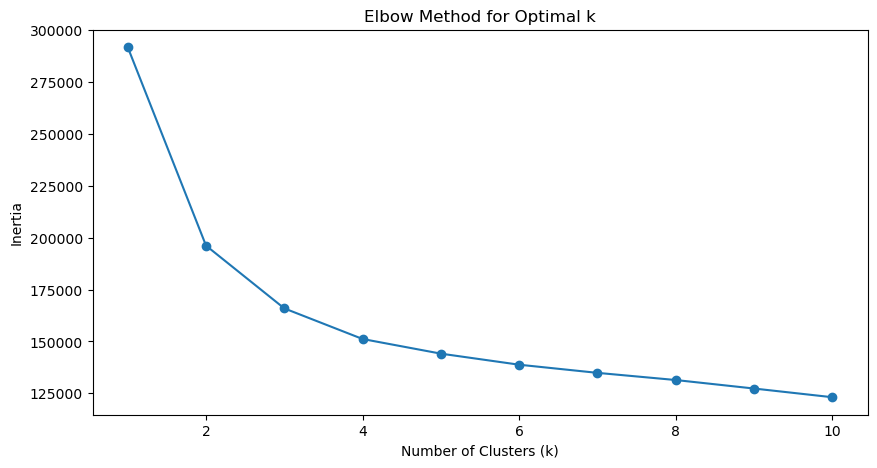

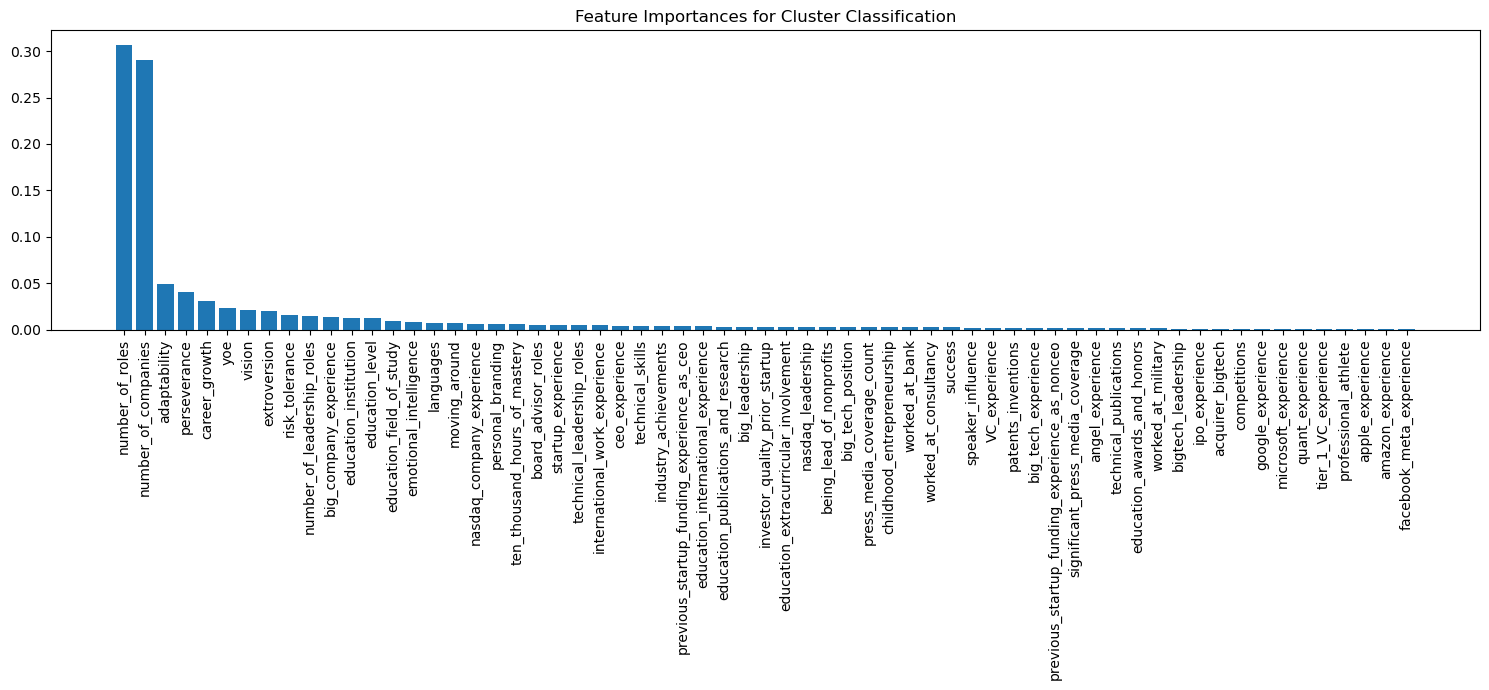

Feature Importances:
number_of_roles: 0.3069853689295584
number_of_companies: 0.29046028341387886
adaptability: 0.048634141137032606
perseverance: 0.04067074393713435
career_growth: 0.030978105478678346
yoe: 0.022827718809297296
vision: 0.021264124216609216
extroversion: 0.01969177848348838
risk_tolerance: 0.01621256828427697
number_of_leadership_roles: 0.01494169545599835
big_company_experience: 0.014053296270973395
education_institution: 0.012979302449900452
education_level: 0.012860272409394136
education_field_of_study: 0.009759497453057243
emotional_intelligence: 0.008385129306950637
languages: 0.007266901654327373
moving_around: 0.006823669083829181
nasdaq_company_experience: 0.006544590693356703
personal_branding: 0.0063215380231044175
ten_thousand_hours_of_mastery: 0.005915761824851056
board_advisor_roles: 0.00537037559775641
startup_experience: 0.004738558737222826
technical_leadership_roles: 0.004729977675666853
international_work_experience: 0.00469550385031426
ceo_experience

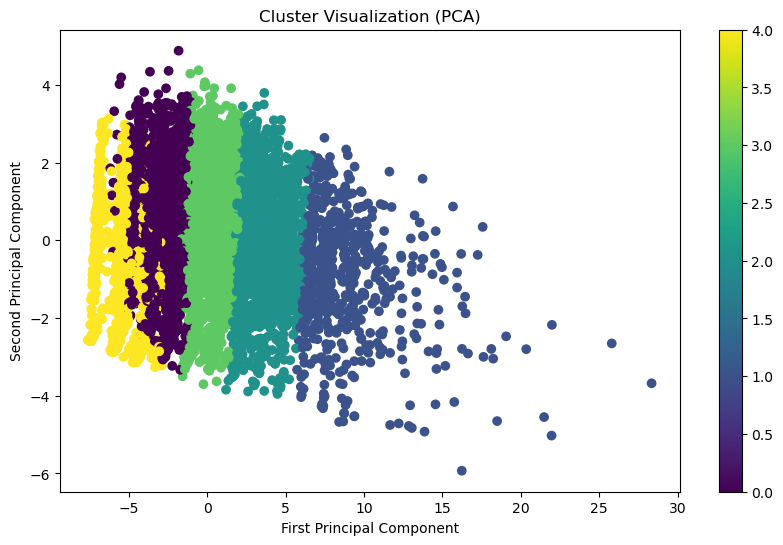

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_df = pd.read_csv('../data/cleaned_dataset.csv')

# Use all columns for clustering
features_for_clustering = cleaned_df.columns.tolist()

# Prepare data for clustering
X_cluster = cleaned_df[features_for_clustering]


# Step 2: Determine optimal number of clusters using Elbow Method
def elbow_method(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

# Run elbow method to help choose number of clusters
elbow_method(X_cluster)

# Step 3: Perform K-Means Clustering
# Choose number of clusters based on elbow plot
n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to the original dataframe
cleaned_df['Cluster'] = cluster_labels

# Step 4: Feature Importance using Random Forest
def get_feature_importance(X, y):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Get feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importances
    plt.figure(figsize=(15, 7))
    plt.title("Feature Importances for Cluster Classification")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [features_for_clustering[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Return feature importance rankings
    return {features_for_clustering[indices[i]]: importances[indices[i]] 
            for i in range(len(features_for_clustering))}

# Get feature importances
feature_importances = get_feature_importance(X_cluster, cluster_labels)

# Print feature importances
print("Feature Importances:")
for feature, importance in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

# Step 5: Cluster Profiling
def profile_clusters(df, cluster_column):
    # Use describe() for a comprehensive profile
    cluster_profiles = df.groupby(cluster_column).describe()
    return cluster_profiles

cluster_profiles = profile_clusters(cleaned_df, 'Cluster')
print("\nCluster Profiles:")
print(cluster_profiles)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

The feature importance results may however be instrisically biased, due to their overepresentation in the dataset by virtue of not being binary variables.

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute validation metrics
silhouette = silhouette_score(X_cluster, cluster_labels)
calinski = calinski_harabasz_score(X_cluster, cluster_labels)
davies = davies_bouldin_score(X_cluster, cluster_labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {calinski}")
print(f"Davies-Bouldin Score: {davies}")

Silhouette Score: 0.1231914223885435
Calinski-Harabasz Score: 2253.5247775641246
Davies-Bouldin Score: 2.1627948333446585


In [13]:
import scipy.stats as stats

def cluster_feature_analysis(df, cluster_column, features):
    for feature in features:
        # One-way ANOVA to test for significant differences
        cluster_groups = [group[feature].values for name, group in df.groupby(cluster_column)]
        f_statistic, p_value = stats.f_oneway(*cluster_groups)
        print(f"\nFeature: {feature}")
        print(f"F-statistic: {f_statistic}")
        print(f"p-value: {p_value}")
        
        # Visualization
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=cluster_column, y=feature, data=df)
        plt.title(f'{feature} Distribution Across Clusters')
        plt.show()

# Run the analysis
# cluster_feature_analysis(cleaned_df, 'Cluster', features_for_clustering)


DBSCAN Best Parameters:
Epsilon: 0.7, Min Samples: 7
Number of Clusters: 6


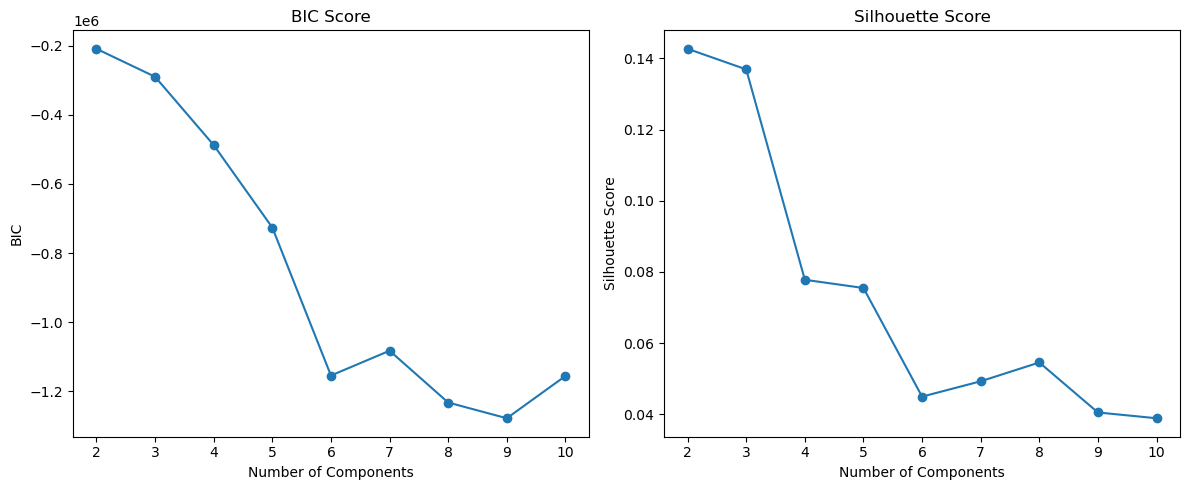


Optimal GMM Components: 2

Hierarchical Clustering:
Best Linkage Method: complete
Best Number of Clusters: 2


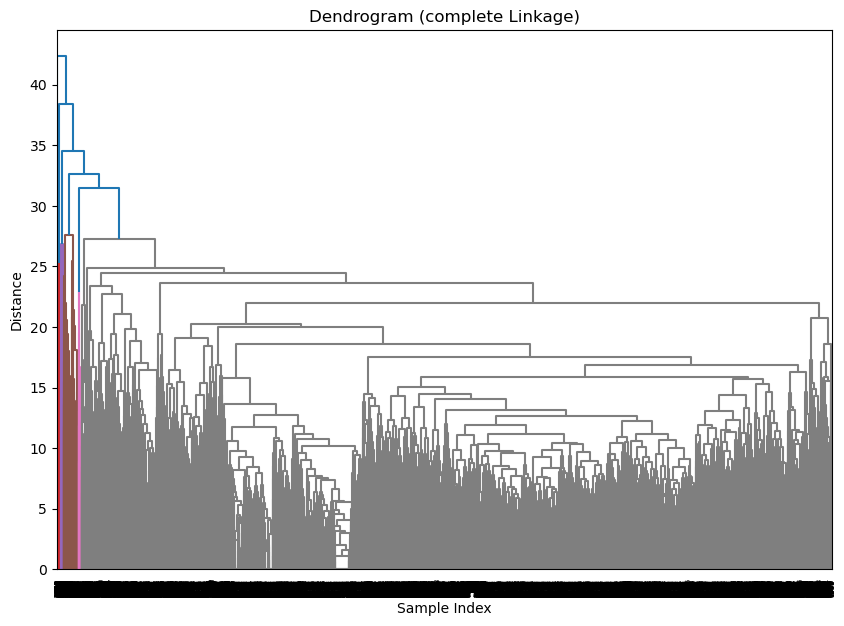

Error processing DBSCAN: num must be an integer with 1 <= num <= 12, not 13
Error processing Gaussian Mixture: num must be an integer with 1 <= num <= 12, not 13
Error processing Hierarchical Clustering: num must be an integer with 1 <= num <= 12, not 13

Comparative Clustering Results:
                         n_clusters  silhouette_score  \
DBSCAN                            6         -0.068660   
Gaussian Mixture                  2          0.142677   
Hierarchical Clustering           2          0.644895   

                         calinski_harabasz_score  davies_bouldin_score  
DBSCAN                                 48.686201              1.034311  
Gaussian Mixture                      584.277262              3.687990  
Hierarchical Clustering               165.408955              0.799354  


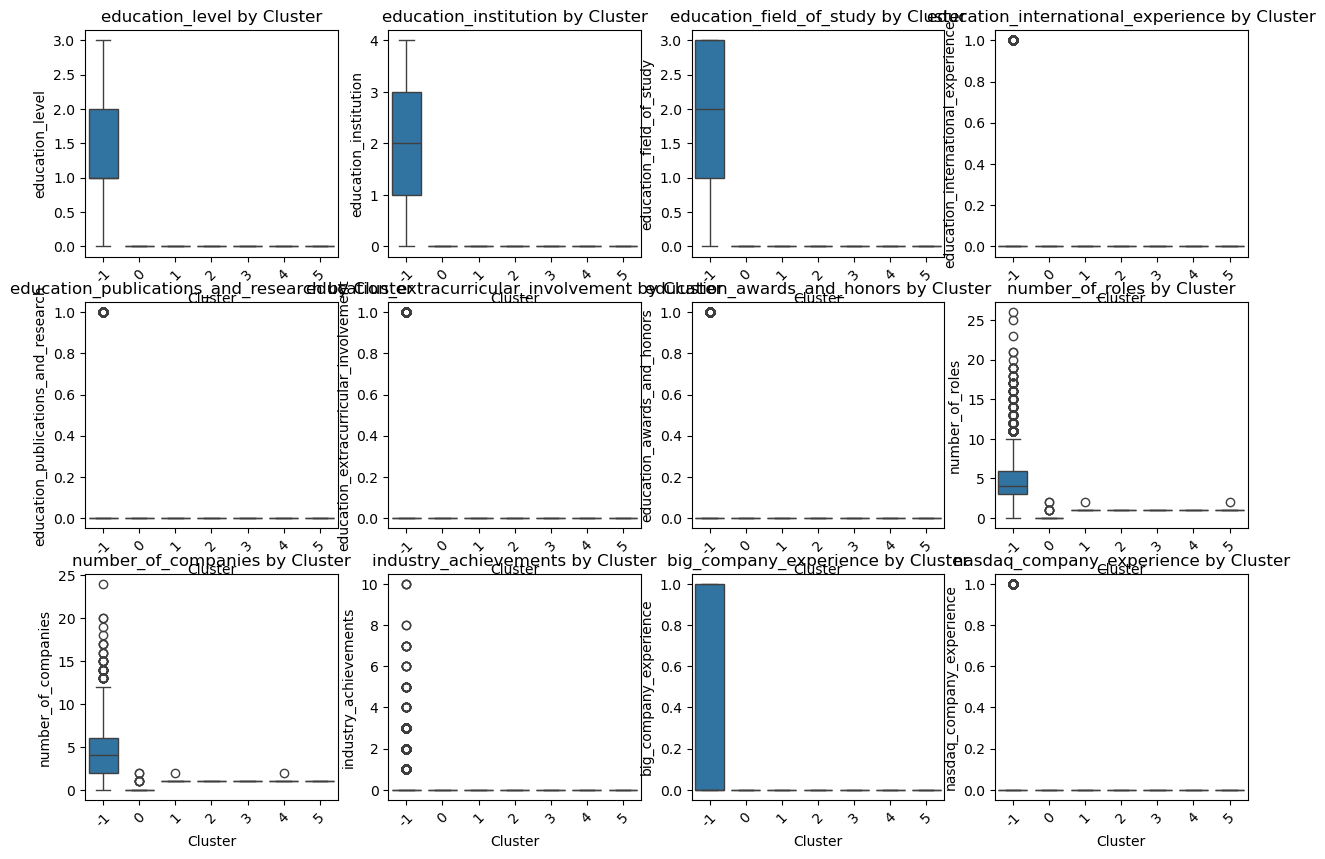

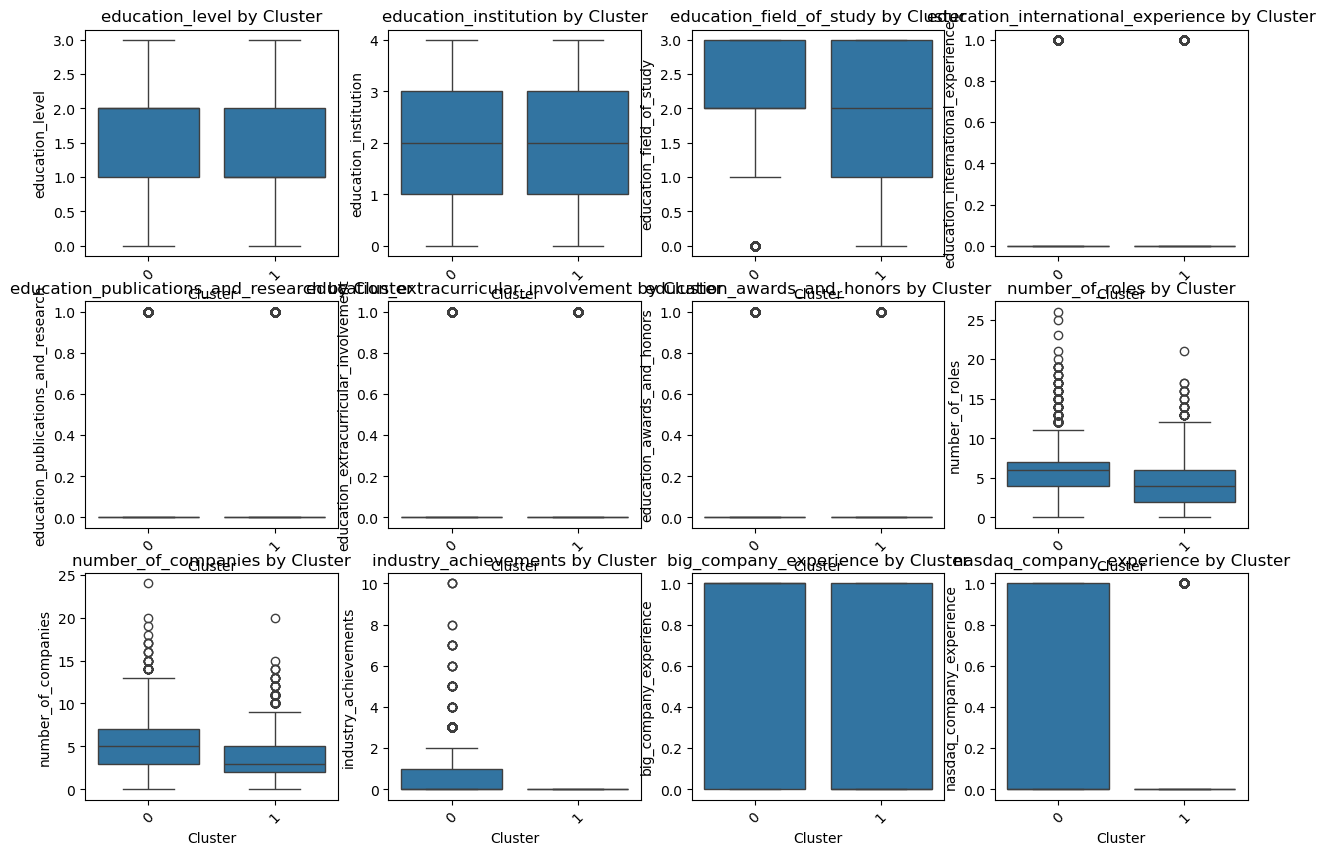

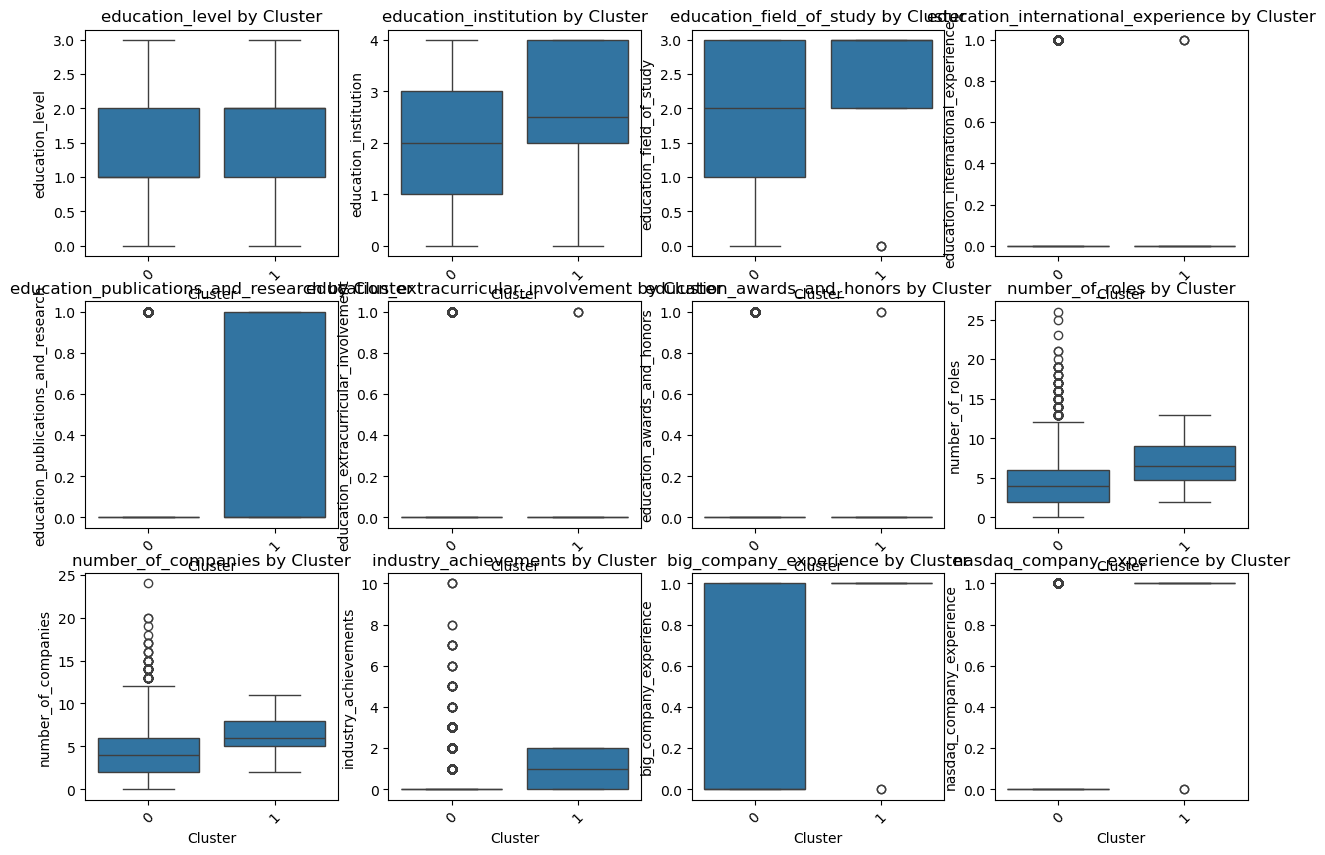

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
cleaned_df = pd.read_csv('../data/cleaned_dataset.csv')
features_for_clustering = cleaned_df.columns.tolist()
X_cluster = cleaned_df[features_for_clustering]

# Comprehensive Clustering Analysis Function
def comprehensive_clustering_analysis(X, feature_names):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Clustering Algorithms
    clustering_methods = {
        'DBSCAN': dbscan_clustering(X_scaled),
        'Gaussian Mixture': gaussian_mixture_clustering(X_scaled),
        'Hierarchical Clustering': hierarchical_clustering(X_scaled)
    }
    
    # Comparative Analysis
    comparative_results = {}
    
    for method_name, (labels, n_clusters) in clustering_methods.items():
        # Validation Metrics
        try:
            silhouette = silhouette_score(X_scaled, labels)
            calinski = calinski_harabasz_score(X_scaled, labels)
            davies = davies_bouldin_score(X_scaled, labels)
            
            comparative_results[method_name] = {
                'n_clusters': n_clusters,
                'silhouette_score': silhouette,
                'calinski_harabasz_score': calinski,
                'davies_bouldin_score': davies
            }
            
            # Cluster Composition Analysis
            cluster_composition(X, labels, method_name, feature_names)
        except Exception as e:
            print(f"Error processing {method_name}: {e}")
    
    # Comparative Results Table
    comparative_df = pd.DataFrame.from_dict(comparative_results, orient='index')
    print("\nComparative Clustering Results:")
    print(comparative_df)
    
    return clustering_methods

# DBSCAN Clustering
def dbscan_clustering(X_scaled):
    # Parameter grid for DBSCAN
    eps_values = [0.3, 0.5, 0.7]
    min_samples_values = [3, 5, 7]
    
    best_silhouette = -1
    best_labels = None
    best_eps = None
    best_min_samples = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            
            # Skip if all points in one cluster or noise
            if len(np.unique(labels)) > 1:
                try:
                    silhouette = silhouette_score(X_scaled, labels)
                    if silhouette > best_silhouette:
                        best_silhouette = silhouette
                        best_labels = labels
                        best_eps = eps
                        best_min_samples = min_samples
                except:
                    pass
    
    print("\nDBSCAN Best Parameters:")
    print(f"Epsilon: {best_eps}, Min Samples: {best_min_samples}")
    
    # Count clusters (excluding noise points)
    n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
    print(f"Number of Clusters: {n_clusters}")
    
    return best_labels, n_clusters

# Gaussian Mixture Clustering
def gaussian_mixture_clustering(X_scaled):
    # Try different numbers of components
    n_components_range = range(2, 11)
    bic = []
    silhouette_scores = []
    
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        labels = gmm.fit_predict(X_scaled)
        
        try:
            silhouette = silhouette_score(X_scaled, labels)
            silhouette_scores.append(silhouette)
            bic.append(gmm.bic(X_scaled))
        except:
            silhouette_scores.append(np.nan)
            bic.append(np.nan)
    
    # Plot BIC and Silhouette
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(list(n_components_range), bic, marker='o')
    plt.title('BIC Score')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    
    plt.subplot(1, 2, 2)
    plt.plot(list(n_components_range), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.show()
    
    # Choose optimal number of components
    optimal_components = n_components_range[np.nanargmax(silhouette_scores)]
    print(f"\nOptimal GMM Components: {optimal_components}")
    
    # Final GMM with optimal components
    gmm = GaussianMixture(n_components=optimal_components, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    
    return labels, optimal_components

# Hierarchical Clustering
def hierarchical_clustering(X_scaled):
    # Linkage methods to try
    linkage_methods = ['ward', 'complete', 'average']
    best_silhouette = -1
    best_labels = None
    best_method = None
    best_n_clusters = None
    
    # Try different numbers of clusters and linkage methods
    for n_clusters in range(2, 11):
        for method in linkage_methods:
            # Agglomerative Clustering
            clustering = AgglomerativeClustering(
                n_clusters=n_clusters, 
                linkage=method
            )
            labels = clustering.fit_predict(X_scaled)
            
            try:
                silhouette = silhouette_score(X_scaled, labels)
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_labels = labels
                    best_method = method
                    best_n_clusters = n_clusters
            except:
                pass
    
    print("\nHierarchical Clustering:")
    print(f"Best Linkage Method: {best_method}")
    print(f"Best Number of Clusters: {best_n_clusters}")
    
    # Dendrogram Visualization
    linkage_matrix = linkage(X_scaled, method=best_method)
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({best_method} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    return best_labels, best_n_clusters

# Cluster Composition Analysis
def cluster_composition(X, labels, method_name, feature_names):
    # Create DataFrame with cluster labels
    df_clustered = pd.DataFrame(X, columns=feature_names)
    df_clustered['Cluster'] = labels
    
    # Basic cluster statistics
    cluster_stats = df_clustered.groupby('Cluster').describe()
    
    # Visualize cluster distributions
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_names, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(x='Cluster', y=feature, data=df_clustered)
        plt.title(f'{feature} by Cluster')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.suptitle(f'Feature Distributions - {method_name}')
    plt.show()
    
    return cluster_stats

# Run the comprehensive analysis
clustering_results = comprehensive_clustering_analysis(X_cluster, features_for_clustering)

In [16]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class SpectralClusteringAdvanced:
    def __init__(self, data, n_clusters_range=(2, 10)):
        """
        Advanced Spectral Clustering with comprehensive analysis
        
        Parameters:
        - data: Input dataset
        - n_clusters_range: Range of cluster numbers to explore
        """
        self.original_data = data
        self.n_clusters_range = n_clusters_range
        
        # Preprocessing
        self.preprocess_data()
        
    def preprocess_data(self):
        """Advanced data preprocessing for spectral clustering"""
        # Standardize the data
        self.scaler = StandardScaler()
        self.scaled_data = self.scaler.fit_transform(self.original_data)
        
    def build_affinity_matrix(self, method='rbf', n_neighbors=10):
        """
        Construct affinity matrix using different methods
        
        Methods:
        - 'rbf': Radial Basis Function kernel
        - 'knn': K-Nearest Neighbors graph
        - 'connectivity': Connectivity graph
        """
        if method == 'rbf':
            # Radial Basis Function kernel
            from sklearn.metrics.pairwise import rbf_kernel
            affinity_matrix = rbf_kernel(self.scaled_data, gamma=None)  # Auto gamma
        
        elif method == 'knn':
            # K-Nearest Neighbors graph
            connectivity = kneighbors_graph(
                self.scaled_data, 
                n_neighbors=n_neighbors, 
                mode='connectivity'
            )
            affinity_matrix = connectivity.toarray()
        
        elif method == 'connectivity':
            # Full connectivity graph
            from scipy.spatial.distance import pdist, squareform
            dist_matrix = squareform(pdist(self.scaled_data))
            affinity_matrix = 1 / (1 + dist_matrix)
        
        return affinity_matrix
    
    def perform_spectral_clustering(self, affinity_matrix=None):
        """
        Comprehensive Spectral Clustering Analysis
        """
        # If no affinity matrix provided, use default RBF
        if affinity_matrix is None:
            affinity_matrix = self.build_affinity_matrix()
        
        # Results storage
        clustering_results = {}
        
        # Exploration of different clustering parameters
        for n_clusters in range(*self.n_clusters_range):
            for affinity_method in ['rbf', 'knn', 'connectivity']:
                # Build affinity matrix
                curr_affinity = self.build_affinity_matrix(method=affinity_method)
                
                # Spectral Clustering
                spectral = SpectralClustering(
                    n_clusters=n_clusters,
                    affinity='precomputed',
                    random_state=42
                )
                
                # Fit and predict
                labels = spectral.fit_predict(curr_affinity)
                
                # Validation metrics
                try:
                    silhouette = silhouette_score(self.scaled_data, labels)
                    calinski = calinski_harabasz_score(self.scaled_data, labels)
                    
                    clustering_results[(n_clusters, affinity_method)] = {
                        'labels': labels,
                        'silhouette_score': silhouette,
                        'calinski_harabasz_score': calinski,
                        'n_clusters': n_clusters,
                        'affinity_method': affinity_method
                    }
                except Exception as e:
                    print(f"Error in clustering (clusters={n_clusters}, method={affinity_method}): {e}")
        
        # Find best clustering
        best_result = max(
            clustering_results.values(), 
            key=lambda x: x['silhouette_score']
        )
        
        return clustering_results, best_result
    
    def visualize_clustering(self, labels, title):
        """
        Advanced visualization of clustering results
        """
        # Dimensionality reduction for visualization
        from sklearn.decomposition import PCA
        
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(self.scaled_data)
        
        # Plotting
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(
            X_pca[:, 0], 
            X_pca[:, 1], 
            c=labels, 
            cmap='viridis'
        )
        plt.colorbar(scatter)
        plt.title(title)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.show()
    
    def graph_spectral_representation(self, affinity_matrix):
        """
        Create graph representation of spectral clustering
        """
        # Create networkx graph
        G = nx.from_numpy_array(affinity_matrix)
        
        # Spring layout for visualization
        pos = nx.spring_layout(G)
        
        plt.figure(figsize=(15, 10))
        nx.draw(
            G, 
            pos, 
            node_color='lightblue', 
            with_labels=False, 
            node_size=50, 
            alpha=0.8
        )
        plt.title('Spectral Clustering Graph Representation')
        plt.show()

# Usage example
spectral_clustering = SpectralClusteringAdvanced(cleaned_df)
results, best_result = spectral_clustering.perform_spectral_clustering()

/Users/moncef/Documents/vela_mip/envs/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/moncef/Documents/vela_mip/envs/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/moncef/Documents/vela_mip/envs/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/moncef/Documents/vela_mip/envs/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/moncef/Documents/vela_mip/envs/lib/python3.12/s